In [2]:
import get_data
import numpy as np
import pandas as pd
import regression_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
inspector = get_data.get('./insurance.csv')
by_row,by_feature = inspector.detect_missing_values()

In [5]:
by_feature

,missing count
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [22]:
outliers = inspector.modified_zScore()
outliers

,age,bmi,children,charges
0,1.124167,0.403409,0.6745,1.008357
1,1.180375,0.543795,0.0000,1.028999
2,0.618292,0.419545,1.3490,0.662917
3,0.337250,1.241693,0.6745,1.693715
4,0.393458,0.245273,0.6745,0.741217
...,...,...,...,...
1333,0.618292,0.091977,1.3490,0.163763
1334,1.180375,0.245273,0.6745,0.964431
1335,1.180375,1.040795,0.6745,1.041863
1336,1.011750,0.742273,0.6745,0.991047


In [23]:
# age outliers
outliers[outliers['age']>=3]

,age,bmi,children,charges


In [24]:
# bmi outliers
outliers[outliers['bmi']>=3]

,age,bmi,children,charges
116,1.067958,3.011045,0.6745,0.268697
847,0.899333,3.224045,0.0000,0.933242
1047,0.955542,3.579045,0.0000,4.719896
1317,1.180375,3.667795,0.6745,1.104542


In [25]:
# children outliers
outliers[outliers['children']>=3]

,age,bmi,children,charges


In [26]:
# charges outliers
outliers[outliers['charges']>=3]

,age,bmi,children,charges
14,0.674500,1.892795,0.6745,4.062749
19,0.505875,0.790682,0.6745,3.689896
23,0.281042,0.245273,0.0000,3.806069
29,0.449667,0.952045,0.6745,3.941691
30,0.955542,0.839091,0.6745,3.521647
...,...,...,...,...
1301,1.292792,0.076648,1.3490,5.017820
1303,0.224833,0.419545,0.6745,3.823251
1308,0.786917,0.032273,0.6745,3.295200
1313,1.124167,0.693864,0.6745,3.630776


In [6]:
target = data['charges']
data = data.drop(labels='charges',axis=1)

In [7]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [8]:
vfi = pd.DataFrame()
vfi['features'] = numeric_data.columns
vfi['VFI'] = [variance_inflation_factor(numeric_data.values,i) for i in range(numeric_data.shape[1])]
vfi.sort_values(by='VFI')

,features,VFI
2,children,1.796637
0,age,7.536550
1,bmi,7.846515


In [9]:
full = pd.get_dummies(data)
full.ndim

2

In [10]:
np.ones(full.shape[0]).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [11]:
full = np.hstack([full,np.ones(full.shape[0]).reshape(-1,1)])
full.shape

(1338, 12)

In [12]:
train_x,test_x,train_y,test_y = train_test_split(full,target,test_size=0.2,random_state=42)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1070, 12), (1070,), (268, 12), (268,))

In [13]:
weights = regression_model.regression(train_x,train_y)

In [14]:
weights

array([   256.97570583,    337.09255195,    425.27878352,   -118.37875696,
         -136.9704486 , -11953.23903066,  11697.8898251 ,    395.74794285,
           25.07061663,   -262.11635371,   -414.05141133,   -255.34920556])

In [15]:
predict_1 = np.dot(test_x,weights)
predict_1

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [16]:
r2_score(test_y,predict_1)*100, mean_squared_error(test_y,predict_1)

(78.35929767120724, 33596915.851361446)

In [17]:
weights_gd,cost_history = regression_model.fit(np.sqrt(train_x),np.sqrt(train_y),0.001,10001)
weights_gd

array([ 15.74645111,   6.41794801,   4.10267011,  -0.40250128,
        -1.52602772, -44.4207607 ,  42.4922317 ,   1.58144123,
        -0.71585752,  -0.41115258,  -2.38296013,  -1.928529  ])

In [18]:
predict_2 = np.dot(np.sqrt(test_x),weights_gd)
predict_2

array([ 98.46396551,  82.17532272, 198.69449287,  97.87685281,
       143.21899292,  87.69752616,  51.62268703, 116.89383798,
        64.83866496, 103.11650099, 161.70993724,  93.53389224,
        76.64847445, 194.29618471, 201.65281452, 192.43003391,
       110.79267658, 190.64811793,  97.72825121, 175.97926913,
        69.02365163,  95.4443382 ,  53.76503488,  69.17865932,
       105.0158918 , 107.23107523, 110.86003007,  76.84546798,
       101.68461938,  53.7545403 ,  93.39990553, 107.62143815,
        62.89487344,  74.55128551,  69.28840303,  99.82813569,
        60.1032371 ,  93.31821664, 188.62372222, 175.28532025,
        62.99881078,  65.30367572, 111.20414252, 104.74323103,
        86.34580446, 108.45118186,  67.7122727 ,  68.34083161,
       187.48058048,  84.95350148, 116.48844134,  57.4042231 ,
        97.52919109,  53.31647224, 107.20782667, 107.22014197,
        72.33660853, 170.73714448, 107.710771  , 106.47323829,
       112.04059419,  87.0299552 , 118.39260409,  92.46

In [19]:
r2_score(np.sqrt(test_y),predict_2)*100, mean_squared_error(np.sqrt(test_y),predict_2)

(80.27946220684301, 478.51448142368764)

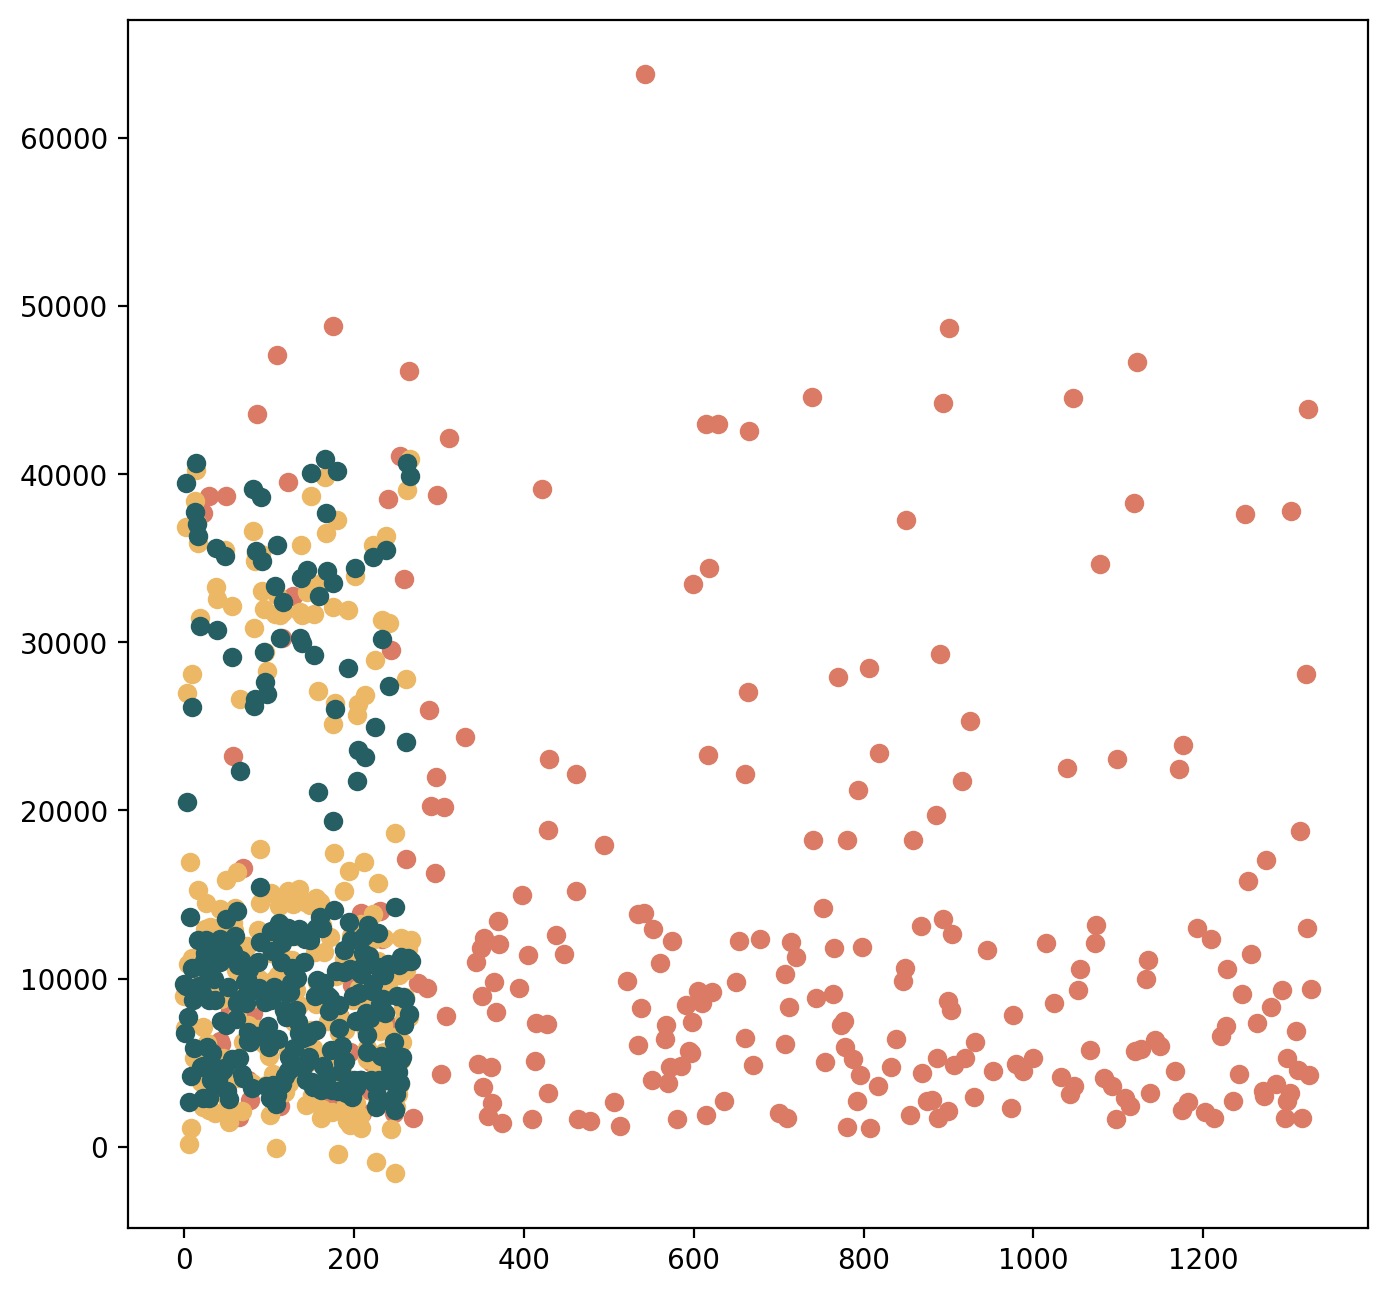

In [21]:
plt.figure(figsize=[8,8],dpi=200)
plt.plot(test_y,'o',color='#DB7B65')
plt.plot(predict_1,'o',color='#ECB865')
plt.plot(np.square(predict_2),'o',color='#255E63')
plt.show()